# Description:

Calculates skewness of the 2D distribution of the parcels at every hour of the simulation run

In [1]:
from datetime import timedelta, datetime
from glob import glob
import xarray as xr
import numpy as np
import matplotlib.gridspec as gridspec


import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

from collections import namedtuple
from shapely import geometry

import scipy 
from scipy import stats, optimize, interpolate

In [2]:
%load_ext autoreload
%autoreload 2
%load_ext version_information
%version_information numpy, matplotlib, xarray, cartopy, scipy

Software versions
Python 3.8.5 64bit [Clang 10.0.0 ]
IPython 7.20.0
OS macOS 10.15.7 x86_64 i386 64bit
numpy 1.19.2
matplotlib 3.2.2
xarray 0.16.2
cartopy 0.18.0
scipy 1.6.0
Tue Feb 23 16:51:11 2021 CET

In [3]:
filedir = "/Volumes/LaCie/UU_machines/gemini/data/output_data/data_Laura/outputs_parcels/Azores/eNATL60/"

In [4]:
ds_nT_Dec_month = xr.open_dataset(filedir + 'Particle_AZO_grid100000p_ntides_1201_hourly_MONTH.nc')
ds_wT_Dec_month = xr.open_dataset(filedir + 'Particle_AZO_grid100000p_wtides_1201_hourly_MONTH.nc')

ds_nT_Jan_month = xr.open_dataset(filedir + 'Particle_AZO_grid100000p_ntides_0101_hourly_MONTH.nc')
ds_wT_Jan_month = xr.open_dataset(filedir + 'Particle_AZO_grid100000p_wtides_0101_hourly_MONTH.nc')

ds_nT_Feb_month = xr.open_dataset(filedir + 'Particle_AZO_grid100000p_ntides_0201_hourly_MONTH.nc')
ds_wT_Feb_month = xr.open_dataset(filedir + 'Particle_AZO_grid100000p_wtides_0201_hourly_MONTH.nc')

In [5]:
ds_nT_Mar_month = xr.open_dataset(filedir + 'Particle_AZO_grid100000p_ntides_0301_hourly_MONTH.nc')
ds_wT_Mar_month = xr.open_dataset(filedir + 'Particle_AZO_grid100000p_wtides_0301_hourly_MONTH.nc')

ds_nT_Apr_month = xr.open_dataset(filedir + 'Particle_AZO_grid100000p_ntides_0401_hourly_MONTH.nc')
ds_wT_Apr_month = xr.open_dataset(filedir + 'Particle_AZO_grid100000p_wtides_0401_hourly_MONTH.nc')

ds_nT_May_month = xr.open_dataset(filedir + 'Particle_AZO_grid100000p_ntides_0501_hourly_MONTH.nc')
ds_wT_May_month = xr.open_dataset(filedir + 'Particle_AZO_grid100000p_wtides_0501_hourly_MONTH.nc')

In [6]:
ds_nT_Jun_month = xr.open_dataset(filedir + 'Particle_AZO_grid100000p_ntides_0601_hourly_MONTH.nc')
ds_wT_Jun_month = xr.open_dataset(filedir + 'Particle_AZO_grid100000p_wtides_0601_hourly_MONTH.nc')

ds_nT_Jul_month = xr.open_dataset(filedir + 'Particle_AZO_grid100000p_ntides_0701_hourly_MONTH.nc')
ds_wT_Jul_month = xr.open_dataset(filedir + 'Particle_AZO_grid100000p_wtides_0701_hourly_MONTH.nc')

ds_nT_Aug_month = xr.open_dataset(filedir + 'Particle_AZO_grid100000p_ntides_0801_hourly_MONTH.nc')
ds_wT_Aug_month = xr.open_dataset(filedir + 'Particle_AZO_grid100000p_wtides_0801_hourly_MONTH.nc')

In [7]:
ds_nT_Sep_month = xr.open_dataset(filedir + 'Particle_AZO_grid100000p_ntides_0901_hourly_MONTH.nc')
ds_wT_Sep_month = xr.open_dataset(filedir + 'Particle_AZO_grid100000p_wtides_0901_hourly_MONTH.nc')

ds_nT_Oct_month = xr.open_dataset(filedir + 'Particle_AZO_grid100000p_ntides_1001_hourly_MONTH.nc')
ds_wT_Oct_month = xr.open_dataset(filedir + 'Particle_AZO_grid100000p_wtides_1001_hourly_MONTH.nc')

ds_nT_Nov_month = xr.open_dataset(filedir + 'Particle_AZO_grid100000p_ntides_1101_hourly_MONTH.nc')
ds_wT_Nov_month = xr.open_dataset(filedir + 'Particle_AZO_grid100000p_wtides_1101_hourly_MONTH.nc')

In [8]:
def rem_nans(ds):
    """
    This renders lon and lat variables without nans for the last timestep.
    """
    bad_indices = np.isnan(ds['lon'][:,-1]) | np.isnan(ds['lat'][:,-1])
    good_indices = ~bad_indices
    lon_end_nonans = ds['lon'][:,-1][good_indices]
    lat_end_nonans = ds['lat'][:,-1][good_indices]
    
    return lon_end_nonans, lat_end_nonans

# Final grid

In [9]:
def plot_particles(dsp, axn, ntitle, splot='end'):
    """
    splot: (end by default)
    - end : end distribution of particles
    -hist2d : 2d histogram of end distribution of particles
    """
    axn.set_xlim([-35,-18])
    axn.set_ylim([30,40])
    axn.coastlines(resolution='50m', color='black', linewidth=1, zorder=50)
    axn.add_feature(cartopy.feature.LAND, facecolor='burlywood', zorder=20) 
    
    ######
    # Title
    if ntitle in ntitles[0:6]:
        nyear = '2009'
    elif ntitle in ntitles[6::]:
        nyear = '2010'
    else:
        print('Error nyear')
        dgdsgsg
        
    strtitle = ntitle + ' ' + nyear
    axn.set_title(strtitle, size=16)
    ######
    
    if splot == 'end':
        axn.scatter(dsp['lon'][:,-1], dsp['lat'][:,-1], s=.01, transform=ccrs.PlateCarree()) #marker='o'
  
        axn.set_xticks([-35, -30., -25., -20.], crs=ccrs.PlateCarree())
        axn.set_yticks([30., 33., 36., 39.],crs=ccrs.PlateCarree())
    
    elif splot == 'hist2d':
        lon_end_nonans, lat_end_nonans = rem_nans(dsp)
        cc = axn.hist2d(lon_end_nonans, lat_end_nonans, bins=nbins, range=((xmin, xmax), (ymin, ymax)), vmin=vmin, vmax=vmax)
        ax1.set_xticks([-31, -29., -27., -25., -23., -21.], crs=ccrs.PlateCarree()) # -32, -21
        ax1.set_yticks([32., 34., 36., 38.],crs=ccrs.PlateCarree()) # 32, 38

        return cc




In [10]:
ntitles = ['Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'] # order by OGCM months


In [11]:
dsps_nT = [ds_nT_Jul_month,
ds_nT_Aug_month,
ds_nT_Sep_month,
ds_nT_Oct_month,
ds_nT_Nov_month,
ds_nT_Dec_month,
ds_nT_Jan_month,
ds_nT_Feb_month,
ds_nT_Mar_month,
ds_nT_Apr_month,
ds_nT_May_month,
ds_nT_Jun_month]

In [12]:
dsps_wT = [ds_wT_Jul_month,
ds_wT_Aug_month,
ds_wT_Sep_month,
ds_wT_Oct_month,
ds_wT_Nov_month,
ds_wT_Dec_month,
ds_wT_Jan_month,
ds_wT_Feb_month,
ds_wT_Mar_month,
ds_wT_Apr_month,
ds_wT_May_month,
ds_wT_Jun_month]

In [13]:

# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=.5)


# Subregion selected:

In [14]:
Region = namedtuple('Region',field_names=['region_name','lonmin','lonmax','latmin','latmax'])

subregion =  Region(
        region_name="Azores_subregion",
        lonmin=-27., 
        lonmax=-21., 
        latmin=32.5, 
        latmax=36.5
)#lomin -35 #lomax -18 # lamin 30 # lamax 40

In [15]:
geom = geometry.box(minx=subregion.lonmin,maxx=subregion.lonmax,miny=subregion.latmin,maxy=subregion.latmax)

In [16]:
nbins = (60, 40)

xmin = subregion.lonmin
xmax = subregion.lonmax
ymin = subregion.latmin
ymax = subregion.latmax

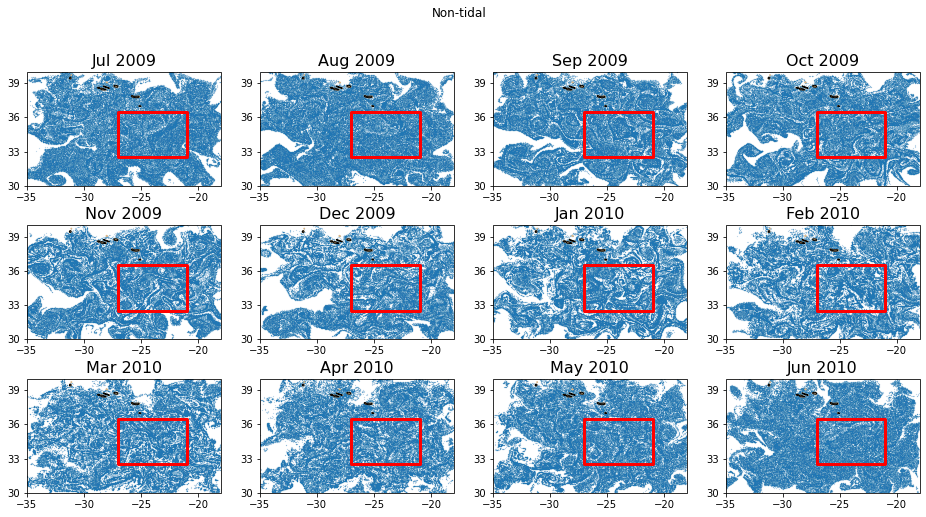

In [28]:
fig = plt.figure(figsize=(16,8)) #(17,5)

#cbar_ticks = [0.005, 0.0055, 0.006, 0.0065, 0.007, 0.0075, 0.008, 0.0085, 0.009] 

gs = gridspec.GridSpec(3, 4)#, width_ratios=[.33, .33, .33]) #, .01])
#axC = plt.subplot(gs[:, -1])

###################
# Non-tidal:
for ii in range(0,12):
    ax1 = plt.subplot(gs[ii], projection=ccrs.PlateCarree())
    #dsp = 'ds_nT_' + ntitles[ii] + '_month'
    plot_particles(dsps_nT[ii], ax1, ntitles[ii])
    ax1.add_geometries([geom], crs=cartopy.crs.PlateCarree(), facecolor='none', edgecolor='red', linewidth=3)


#plt.axis('equal')
# cbar = plt.colorbar(ss, cax=axC, extend='both')
# cbar.ax.get_yaxis().labelpad = 15
# cbar.ax.set_ylabel('Gaussian Kernel Density Estimation', rotation = 270, size=14)
plt.suptitle('Non-tidal')
plt.show()




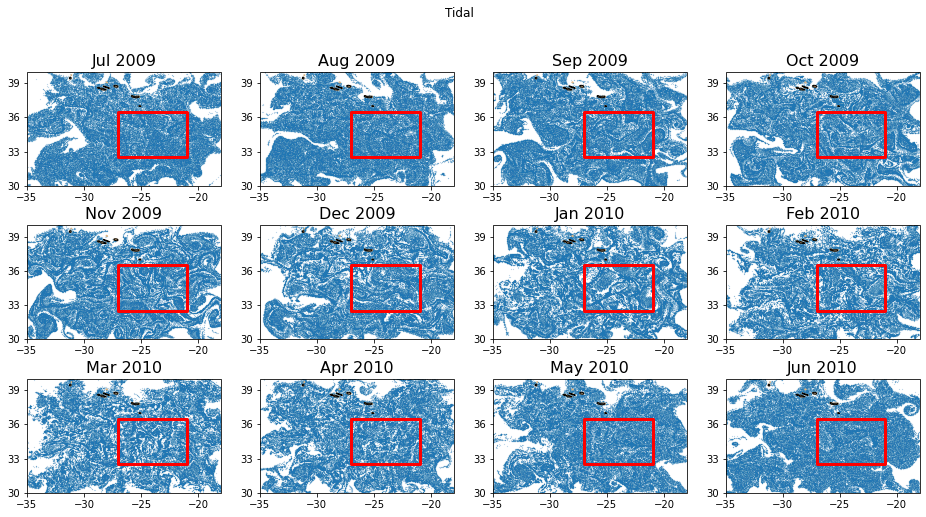

In [29]:
fig = plt.figure(figsize=(16,8)) #(17,5)

#cbar_ticks = [0.005, 0.0055, 0.006, 0.0065, 0.007, 0.0075, 0.008, 0.0085, 0.009] 

gs = gridspec.GridSpec(3, 4)#, width_ratios=[.33, .33, .33]) #, .01])
#axC = plt.subplot(gs[:, -1])

###################
# Non-tidal:
for ii in range(0,12):
    ax1 = plt.subplot(gs[ii], projection=ccrs.PlateCarree())
    plot_particles(dsps_wT[ii], ax1, ntitles[ii])
    ax1.add_geometries([geom], crs=cartopy.crs.PlateCarree(), facecolor='none', edgecolor='red', linewidth=3)

#plt.axis('equal')
# cbar = plt.colorbar(ss, cax=axC, extend='both')
# cbar.ax.get_yaxis().labelpad = 15
# cbar.ax.set_ylabel('Gaussian Kernel Density Estimation', rotation = 270, size=14)
plt.suptitle('Tidal')

plt.show()





# Subregion histogram 2D 0.1 degree bins:

In [17]:
vmin=0.
vmax=30.

# Skewness time evolution:

In [ ]:
#from scipy.stats import skew
#"tas_skew = tas_anom.reduce(skew,dim=('time'))\n",
#    "tas_skew.plot(size=11)"

# Skewness trial wo/ removing nans:

In [32]:
dsps_nT[0]

<xarray.Dataset>
Dimensions:     (obs: 673, traj: 106926)
Dimensions without coordinates: obs, traj
Data variables:
    trajectory  (traj, obs) float64 ...
    time        (traj, obs) datetime64[ns] ...
    lat         (traj, obs) float64 ...
    lon         (traj, obs) float64 ...
    z           (traj, obs) float64 ...
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.2.2.dev126+g6dd05b7
    parcels_mesh:           spherical

In [34]:
ntitles

['Jul',
 'Aug',
 'Sep',
 'Oct',
 'Nov',
 'Dec',
 'Jan',
 'Feb',
 'Mar',
 'Apr',
 'May',
 'Jun']

In [19]:
skw_2D_intime_nT = np.nan * np.ones((len(ntitles), dsps_nT[0]['lon'].shape[1])) # nmonths, timesteps
skw_2D_intime_wT = np.nan * np.ones((len(ntitles), dsps_wT[0]['lon'].shape[1])) # nmonths, timesteps



# February:

In [45]:
ifeb = ntitles.index('Feb')
ifeb 

7

In [46]:
dsps_nT[ifeb]['lon'].shape[1]

649

In [20]:
for mm in range(0, len(ntitles)):
    for tt in range(0, dsps_nT[mm]['lon'].shape[1]):
        counts_nT, _, _ = np.histogram2d(dsps_nT[mm]['lon'][:,tt], dsps_nT[mm]['lat'][:,tt], bins=nbins, range=((xmin, xmax), (ymin, ymax)))
        skw_2D_intime_nT[mm,tt] = scipy.stats.skew(counts_nT.ravel())
        
        counts_wT, _, _ = np.histogram2d(dsps_wT[mm]['lon'][:,tt], dsps_wT[mm]['lat'][:,tt], bins=nbins, range=((xmin, xmax), (ymin, ymax)))
        skw_2D_intime_wT[mm,tt] = scipy.stats.skew(counts_wT.ravel())


In [21]:
skw_2D_intime_wT[:,0]

array([0.41184708, 0.41184708, 0.41184708, 0.41184708, 0.41184708,
       0.41184708, 0.41184708, 0.41184708, 0.41184708, 0.41184708,
       0.41184708, 0.41184708])

In [22]:
skw_2D_intime_wT[:,-1]

array([0.64998531, 0.65709291, 1.4108514 , 1.43676024, 3.03188891,
       2.23003586, 3.19853484,        nan, 2.06771686, 2.42634043,
       1.36144813, 2.44276146])

In [23]:
np.savez('skew_2D_months_subregion_v02.npz', skw_2D_intime_nT=skw_2D_intime_nT, skw_2D_intime_wT=skw_2D_intime_wT) 